In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import geopandas as gpd

c:\Users\karla\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
# Load datasets
pois = pd.read_csv('data\POIs\POI_4815075.csv')
names = gpd.read_file('data\STREETS_NAMING_ADDRESSING\SREETS_NAMING_ADDRESSING_4815075.geojson')
nav = gpd.read_file('data\STREETS_NAV\SREETS_NAV_4815075.geojson')

In [44]:
nav.columns

Index(['AR_AUTO', 'AR_BUS', 'AR_CARPOOL', 'AR_DELIV', 'AR_EMERVEH', 'AR_MOTOR',
       'AR_PEDEST', 'AR_TAXIS', 'AR_TRAFF', 'AR_TRUCKS', 'BRIDGE', 'CONTRACC',
       'COVERIND', 'DIR_TRAVEL', 'DIVIDER', 'FERRY_TYPE', 'FROM_LANES',
       'FRONTAGE', 'FR_SPD_LIM', 'FUNC_CLASS', 'INDESCRIB', 'INTERINTER',
       'LANE_CAT', 'link_id', 'LOW_MBLTY', 'MANOEUVRE', 'MULTIDIGIT', 'PAVED',
       'POIACCESS', 'PRIORITYRD', 'PRIVATE', 'PUB_ACCESS', 'RAMP',
       'ROUNDABOUT', 'SPEED_CAT', 'TOLLWAY', 'TO_LANES', 'TO_SPD_LIM',
       'TUNNEL', 'UNDEFTRAFF', 'URBAN', 'geometry'],
      dtype='object')

In [38]:
names.columns

Index(['ADDR_TYPE', 'link_id', 'L_ADDRFORM', 'L_ADDRSCH', 'L_NREFADDR',
       'L_REFADDR', 'R_ADDRFORM', 'R_ADDRSCH', 'R_NREFADDR', 'R_REFADDR',
       'ST_LANGCD', 'ST_NAME', 'ST_NM_BASE', 'ST_NM_SUFF', 'ST_TYP_AFT',
       'ST_TYP_ATT', 'ST_TYP_BEF', 'geometry'],
      dtype='object')

In [ ]:
# Combine Linestring geometry datasets
combined_map = pd.merge(nav, names, how='inner', on='link_id')

In [43]:
print(names.shape)
print(nav.shape)
print(combined_map.shape)

(31206, 18)
(31206, 42)
(31206, 59)


In [103]:
combined_map.columns

Index(['AR_AUTO', 'AR_BUS', 'AR_CARPOOL', 'AR_DELIV', 'AR_EMERVEH', 'AR_MOTOR',
       'AR_PEDEST', 'AR_TAXIS', 'AR_TRAFF', 'AR_TRUCKS', 'BRIDGE', 'CONTRACC',
       'COVERIND', 'DIR_TRAVEL', 'DIVIDER', 'FERRY_TYPE', 'FROM_LANES',
       'FRONTAGE', 'FR_SPD_LIM', 'FUNC_CLASS', 'INDESCRIB', 'INTERINTER',
       'LANE_CAT', 'link_id', 'LOW_MBLTY', 'MANOEUVRE', 'MULTIDIGIT', 'PAVED',
       'POIACCESS', 'PRIORITYRD', 'PRIVATE', 'PUB_ACCESS', 'RAMP',
       'ROUNDABOUT', 'SPEED_CAT', 'TOLLWAY', 'TO_LANES', 'TO_SPD_LIM',
       'TUNNEL', 'UNDEFTRAFF', 'URBAN', 'ADDR_TYPE', 'L_ADDRFORM', 'L_ADDRSCH',
       'L_NREFADDR', 'L_REFADDR', 'R_ADDRFORM', 'R_ADDRSCH', 'R_NREFADDR',
       'R_REFADDR', 'ST_LANGCD', 'ST_NAME', 'ST_NM_BASE', 'ST_NM_SUFF',
       'ST_TYP_AFT', 'ST_TYP_ATT', 'ST_TYP_BEF', 'geometry'],
      dtype='object')

In [ ]:
# Find mismatched geometries
combined_map["SharedGeo"] = combined_map["geometry_x"].equals(combined_map["geometry_y"])

In [54]:
combined_map["SharedGeo"].unique()

array([ True])

<Axes: >

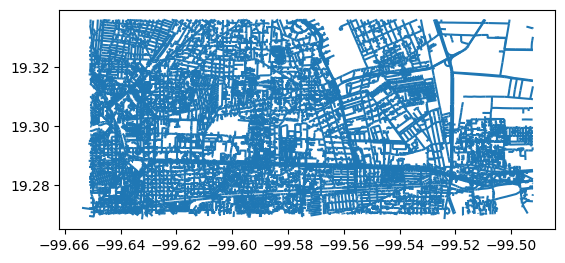

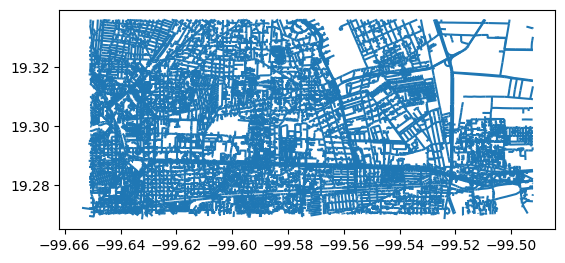

In [53]:
#combined_map.plot()
nav.plot()
names.plot()

In [ ]:
# Analyze Tiles dataframe
tiles = gpd.read_file('data\HERE_L11_Tiles.geojson')

In [57]:
tiles

,L11_Tile_ID,wkt_geometry_of_L11_tile,geometry
0,4815075,"POLYGON ((-99.4921875 19.16015625, -99.4921875...","POLYGON ((-99.49219 19.16016, -99.49219 19.335..."
1,4815075,"POLYGON ((-99.4921875 19.16015625, -99.4921875...","POLYGON ((-99.49219 19.16016, -99.49219 19.335..."
2,4815075,"POLYGON ((-99.4921875 19.16015625, -99.4921875...","POLYGON ((-99.49219 19.16016, -99.49219 19.335..."
3,4815075,"POLYGON ((-99.4921875 19.16015625, -99.4921875...","POLYGON ((-99.49219 19.16016, -99.49219 19.335..."
4,4815078,"POLYGON ((-99.31640625 19.16015625, -99.316406...","POLYGON ((-99.31641 19.16016, -99.31641 19.335..."
...,...,...,...
75,4815440,"POLYGON ((-98.96484375 19.6875, -98.96484375 1...","POLYGON ((-98.96484 19.6875, -98.96484 19.8632..."
76,4815441,"POLYGON ((-98.7890625 19.6875, -98.7890625 19....","POLYGON ((-98.78906 19.6875, -98.78906 19.8632..."
77,4815441,"POLYGON ((-98.7890625 19.6875, -98.7890625 19....","POLYGON ((-98.78906 19.6875, -98.78906 19.8632..."
78,4815441,"POLYGON ((-98.7890625 19.6875, -98.7890625 19....","POLYGON ((-98.78906 19.6875, -98.78906 19.8632..."


In [58]:
combined_map.drop(columns=['geometry_x', 'SharedGeo'], inplace=True)
combined_map.rename(columns={'geometry_y': 'geometry'}, inplace=True)

<Axes: >

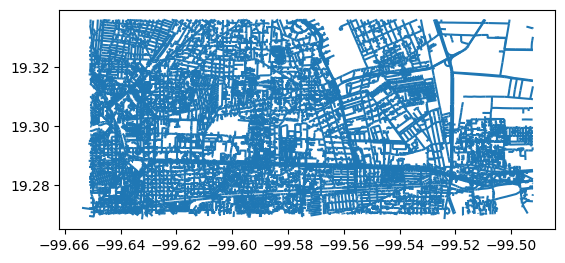

In [60]:
combined_map.plot()

In [73]:
# Check for missing values
# keep only relevant columns for missing values
mv = pd.DataFrame(combined_map.isna().sum())
mv = mv[mv[0] > 0]
mv

,0
ADDR_TYPE,21406
L_ADDRFORM,24389
L_ADDRSCH,24389
L_NREFADDR,24389
L_REFADDR,24389
R_ADDRFORM,24548
R_ADDRSCH,24548
R_NREFADDR,24548
R_REFADDR,24548
ST_LANGCD,10687


## Detect Multiple Digitisation

In [75]:
# Sort DataFrame by street name
combined_map.sort_values(by='ST_NAME', inplace=True)
# Reset index
combined_map.reset_index(drop=True, inplace=True)

In [79]:
len(combined_map["ST_NAME"].unique())

2539

In [80]:
combined_map["ST_NAME"].isna().sum()

10687

### Street Name Repetition Analysis

In [81]:
combined_map["ST_NAME"].shape

(31206,)

(5, 58)


<Axes: >

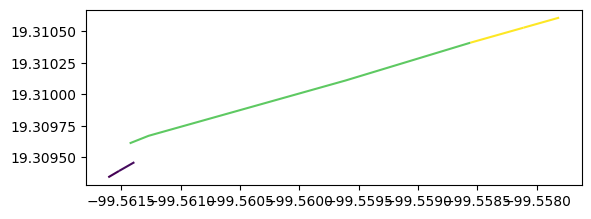

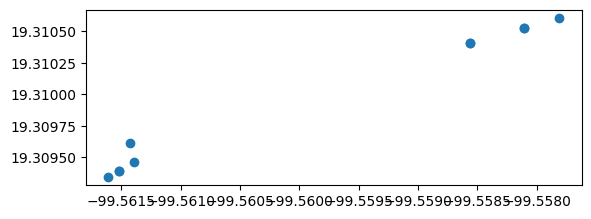

In [93]:
example = combined_map.loc[combined_map["ST_NAME"] == "13 ORIENTE"]
print(example.shape)
example.plot(column = 'link_id')
example.boundary.plot()

In [100]:
combined_map['ST_NAME'].value_counts().head(10)

ST_NAME
AVENIDA SOLIDARIDAD LAS TORRES      487
AVENIDA PASEO TOLLOCAN              453
MEX-15                              337
BOULEVARD MIGUEL ALEMÁN VALDÉS      264
BOULEVARD ISIDRO FABELA             252
CALLE EMILIANO ZAPATA               230
BOULEVARD ALFREDO DEL MAZO VÉLEZ    220
AVENIDA MIGUEL HIDALGO              189
CALLE 16 DE SEPTIEMBRE              177
CALLE INDEPENDENCIA                 166
Name: count, dtype: int64

(487, 58)


<Axes: >

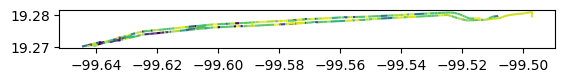

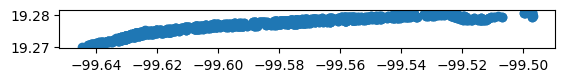

In [101]:
example = combined_map.loc[combined_map["ST_NAME"] == "AVENIDA SOLIDARIDAD LAS TORRES"]
print(example.shape)
example.plot(column = 'link_id')
example.boundary.plot()

(177, 58)


<Axes: >

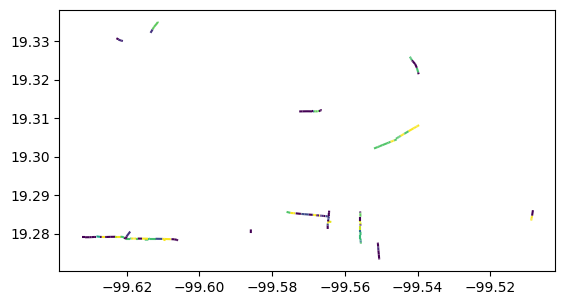

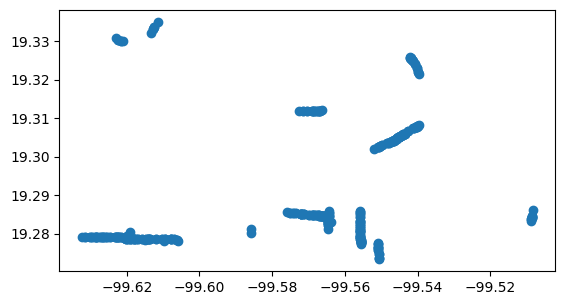

In [102]:
example = combined_map.loc[combined_map["ST_NAME"] == "CALLE 16 DE SEPTIEMBRE"]
print(example.shape)
example.plot(column = 'link_id')
example.boundary.plot()